# What we can achieve using scikit-learn

## ~Classification :
### -Identifying which category an object belongs to. 
     Application: Spam detection

## ~Regression :
### -Predicting an attribute associated with an object.
     Application: Stock prices prediction
        
## ~Clustering :
### -Automatic grouping of similar objects into sets.
     Application : Customer segmentation

## ~Model Selection :
### -Comparing, validating and choosing parameters and models
     Application : Improving model accuracy via parameter tuning
        
## ~Dimensionality reduction :
### -Reducing the number of random variables to consider
     Application : To increase the model efficiency
        
## ~ Pre-Processing :
### -Feature extraction and normalization
     Application : Transforming input data such as text of use with machine learning algorithms

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#from sklearn.Linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
df = pd.read_csv('/media/abhishek/589E61B39E618A782/C-DAC Document/Machine Learning/Sklearn/Dataset/winequality-red.csv')

In [4]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


#### ~~>> Preprocessing Of Data

In [6]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
df['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [7]:
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])

In [8]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [9]:
df['quality'].value_counts()

0    1379
1     217
Name: quality, dtype: int64

/home/abhishek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

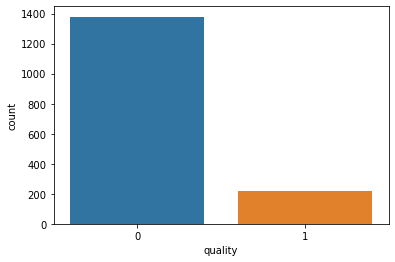

In [10]:
sns.countplot(df['quality'])

## Now seperate the dataset as response variable and feature variable

In [11]:
x = df.drop('quality', axis = 1)
y = df['quality']

## Train and Test splitting of data 

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Applying Standard scaling to get optimized result

In [17]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# ~~>3 Basic Classifiers :

## ~ Random Forest Classifier

In [18]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [19]:
pred_rfc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
x_test[:20]

array([[ 0.73475716, -0.6526123 ,  0.50225915, -0.17133997,  0.06199661,
        -0.5775292 , -0.71905415,  0.5996155 , -0.45786647, -0.59711379,
         0.07391827],
       [-1.03949681,  0.30565386, -1.40574366, -0.24329317,  0.1646006 ,
        -1.25551972, -1.01954314, -0.61287722,  1.99772797, -0.23698277,
         1.01617315],
       [ 0.16241717, -0.03255772,  0.55382679, -0.74696558,  0.1646006 ,
        -1.06180814, -0.86929865, -0.03575186, -0.71635009, -0.83720114,
        -0.9625621 ],
       [ 2.39454313, -0.37076931,  1.84301788, -0.38719957, -0.34841935,
        -0.96495235, -0.95944535,  1.09731993, -2.07338912,  1.26356315,
        -0.20875819],
       [-0.86779481,  1.60213162, -1.14790544, -0.38719957, -0.36894015,
        -0.96495235, -0.98949424, -0.58640358,  1.286898  ,  0.00310458,
         0.35659474],
       [-0.00928483,  0.47475966,  0.14128564, -0.31524637, -0.08164897,
        -0.48067341,  0.09226613,  0.25016345,  0.57606803, -0.29700461,
        -0.208

## let's see how our model preformed

In [25]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.78      0.42      0.55        43

    accuracy                           0.91       320
   macro avg       0.85      0.70      0.75       320
weighted avg       0.90      0.91      0.89       320



In [26]:
print(confusion_matrix(y_test, pred_rfc))

[[272   5]
 [ 25  18]]


## ~ SVM Classifier

In [27]:
clf = svm.SVC()
clf.fit(x_train, y_train)
pred_clf = clf.predict(x_test)

In [29]:
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       277
           1       0.69      0.26      0.37        43

    accuracy                           0.88       320
   macro avg       0.79      0.62      0.65       320
weighted avg       0.87      0.88      0.86       320

[[272   5]
 [ 32  11]]


## ~ Neural Network

In [37]:
mlpc = MLPClassifier(hidden_layer_sizes = (500,600,700,800), max_iter = 10000)
mlpc.fit(x_train, y_train)
pred_mlpc = mlpc.predict(x_test)

In [38]:
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       277
           1       0.67      0.56      0.61        43

    accuracy                           0.90       320
   macro avg       0.80      0.76      0.78       320
weighted avg       0.90      0.90      0.90       320

[[265  12]
 [ 19  24]]


In [39]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.90625

In [40]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [41]:
Xnew = [[4.5,5.4,0.44,0.09,1.4,2.0,53,66,0.6,000.5,9.6]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([0])